In [ ]:
%pip list


Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.27.0.32.44
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread         

In [ ]:
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install imbalanced-learn



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
CHAMPIONGRP_PATH = "/content/drive/MyDrive/data/Champions_Group_2025.csv"
df = pd.read_csv(CHAMPIONGRP_PATH)
df.head()

df.rename(columns={"LATITUDE":"Latitude", "LONGITUDE":"Longitude"}, inplace=True)

In [ ]:
df.shape


(29182, 24)

In [ ]:
headers = df.columns
print(headers)

Index(['Latitude', 'Longitude', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Is Domestic Ultimate', 'Is Global Ultimate'],
      dtype='object')


In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [ ]:
# Drop redundant columns
df.drop('AccountID', axis = 1, inplace = True)
df.drop('SIC Code', axis = 1, inplace = True)
df.drop('8-Digit SIC Code', axis = 1, inplace = True)
df.drop('8-Digit SIC Description', axis = 1, inplace = True)
df.drop('Company Description', axis = 1, inplace = True)
df.drop('Company', axis = 1, inplace = True)

In [ ]:
print(df['Employees (Single Site)'].isnull().sum())
print(df['Import/Export Status'].isnull().sum())
print(df['Fiscal Year End'].isnull().sum())
print(df['Square Footage'].isnull().sum())

12403
22569
22445
29182


#Settling Columns with large proportion of missing values




In [ ]:
df.drop('Employees (Single Site)', axis=1, inplace=True)
df.drop('Import/Export Status', axis=1, inplace=True)
df.drop('Fiscal Year End', axis=1, inplace=True)
df.drop('Square Footage',axis =1, inplace = True)
df.drop('Parent Company', axis = 1, inplace = True)
df.drop('Parent Country', axis = 1, inplace = True)
df.head()

,Latitude,Longitude,Industry,Year Found,Ownership Type,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
0,1.238792,103.685898,"Plastics Materials, Synthetic Resins, and Nonv...",1980.0,Private,Active,300.0,300.0,76973100,76973100,0,0
1,1.240392,103.837565,Offices of Bank Holding Companies,1993.0,Private,Active,100.0,100.0,9499251,9499251,0,0
2,1.240392,103.837565,"Investors, Not Elsewhere Classified",2018.0,Private,Active,22.0,22.0,13738494,13738494,0,0
3,1.240409,103.837960,"Offices of Holding Companies, Not Elsewhere Cl...",2004.0,Private,Active,100.0,100.0,103745791,103745791,0,0
4,1.240784,103.839111,Offices of Bank Holding Companies,1986.0,Private,Active,33.0,33.0,60863682,60863682,1,1


In [ ]:
df.shape

(29182, 12)

In [ ]:
print(df['Year Found'])
print(df['Employees (Domestic Ultimate Total)'])
print(df['Employees (Global Ultimate Total)'])

0        1980.0
1        1993.0
2        2018.0
3        2004.0
4        1986.0
          ...  
29177    2012.0
29178    2010.0
29179    2014.0
29180    2016.0
29181    2008.0
Name: Year Found, Length: 29182, dtype: float64
0        300.0
1        100.0
2         22.0
3        100.0
4         33.0
         ...  
29177      4.0
29178     98.0
29179     14.0
29180     80.0
29181     35.0
Name: Employees (Domestic Ultimate Total), Length: 29182, dtype: float64
0         300.0
1         100.0
2          22.0
3         100.0
4          33.0
          ...  
29177       4.0
29178     394.0
29179    6339.0
29180      80.0
29181      80.0
Name: Employees (Global Ultimate Total), Length: 29182, dtype: float64


In [ ]:
df.isna().sum()

,0
Latitude,120
Longitude,120
Industry,0
Year Found,434
Ownership Type,0
Company Status (Active/Inactive),0
Employees (Domestic Ultimate Total),79
Employees (Global Ultimate Total),2774
Sales (Domestic Ultimate Total USD),0
Sales (Global Ultimate Total USD),0


#Settling Rows With Missing Values

"Year Found" represents a historical fact rather than a continuous variable that fluctuates with other company attributes. Since imputation could introduce artificial data, missing values for "Year Found" are dropped entirely to preserve data integrity.

"Employees (Global Ultimate Total)" is likely to be more dependent on other variables such as global sales. Thus, KNN imputation is used to impute missing values.

"Employees (Domestic Ultimate Total)" however, does not seem to have a significant relationship with other variables. Thus, median imputation is used to impute missing values.

"Latitude" and "Longitude" are geographical features that may influence whether a company is classified as a global or domestic ultimate. Instead of dropping missing values outright, they are imputed using the mean coordinates of companies in the same industry to maintain geographic context as certain industries exhibit geographic clustering due to regional business hubs, supply chain dependencies, or regulatory factors.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

knn_imputer = KNNImputer(n_neighbors=5)
df[['Employees (Global Ultimate Total)']] = knn_imputer.fit_transform(df[['Employees (Global Ultimate Total)']])

median_imputer = SimpleImputer(strategy='median')
df['Employees (Domestic Ultimate Total)'] = median_imputer.fit_transform(df[['Employees (Domestic Ultimate Total)']])

In [ ]:
# CHECK FOR ANY MORE NA VALUES
print(df.shape)
df.isna().sum()


(29182, 12)


,0
Latitude,120
Longitude,120
Industry,0
Year Found,434
Ownership Type,0
Company Status (Active/Inactive),0
Employees (Domestic Ultimate Total),0
Employees (Global Ultimate Total),0
Sales (Domestic Ultimate Total USD),0
Sales (Global Ultimate Total USD),0


In [ ]:
df = df.dropna(subset=['Year Found'])
df['Year Found'] = df['Year Found'].astype(int)

df = df.dropna(subset=['Latitude'])
df = df.dropna(subset=['Longitude'])

df.shape

<ipython-input-18-2add6306b271>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Found'] = df['Year Found'].astype(int)


(28632, 12)

#Identifying Outliers

The three chunk of codes is for the column 'Employees (Domestic Ultimate Total)' and I have used log to transform the data and z score to remove the outliers

In [ ]:

df_new = df.copy()

Text(0.5, 1.0, 'Employees (Domestic Ultimate Total) - Before Removing Outliers')

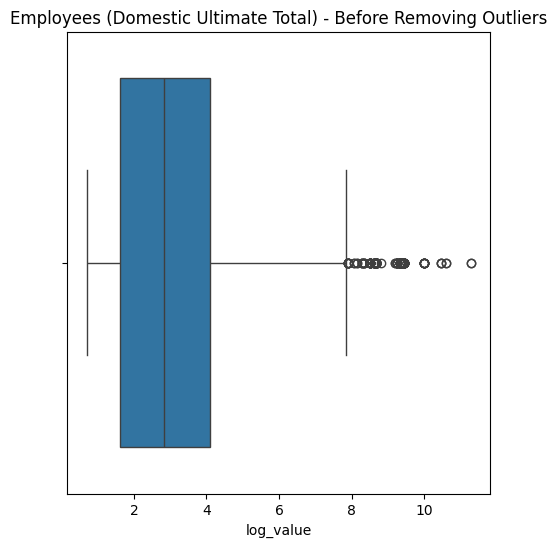

In [ ]:
import pandas as pd
import numpy as np
df_new['log_value'] = np.log1p(df_new['Employees (Domestic Ultimate Total)'])
df_new['z_score'] = stats.zscore(df_new['log_value'])
df_new['is_outlier_z'] = df_new['z_score'].abs() > 3

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First plot
sns.boxplot(x=df_new['log_value'])
plt.title('Employees (Domestic Ultimate Total) - Before Removing Outliers')

In [ ]:
df_copy = df_new[~df_new['is_outlier_z']].copy()

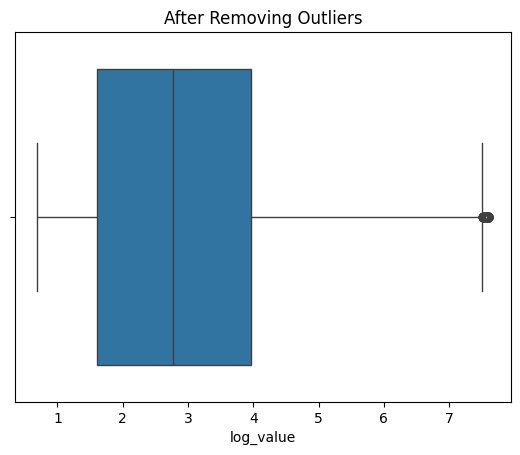

In [ ]:
sns.boxplot(x=df_copy['log_value'],vert=False)
plt.title('After Removing Outliers')
plt.show()

In [ ]:
outliers_df = df_new[df_new['is_outlier_z']]
print(f"Number of outliers removed: {len(outliers_df)}")

df_copy.drop(columns=['z_score', 'is_outlier_z','log_value'], inplace=True)

Number of outliers removed: 228


In [ ]:
df_new = df_copy


In [ ]:
df_new.shape

(28404, 12)

Text(0.5, 1.0, 'Before Removing Outliers')

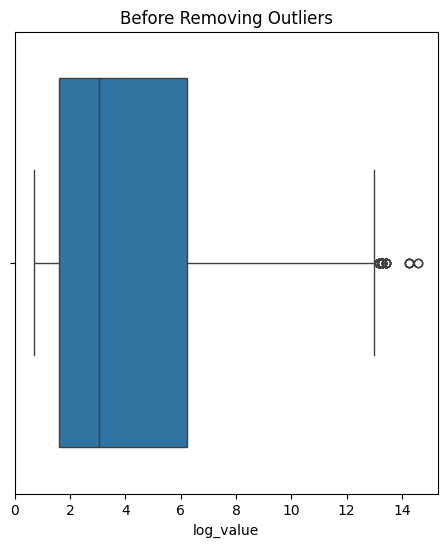

In [ ]:
df_new['log_value'] = np.log1p(df_new['Employees (Global Ultimate Total)' ])
df_new['z_score'] = stats.zscore(df_new['log_value'])
df_new['is_outlier_z'] = df_new['z_score'].abs() > 3

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First plot
sns.boxplot(x=df_new['log_value'])
plt.title('Before Removing Outliers')

In [ ]:
df_copy = df_new[~df_new['is_outlier_z']].copy()

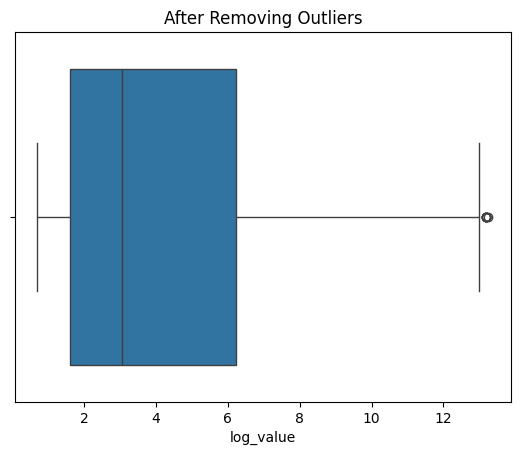

In [ ]:
sns.boxplot(x=df_copy['log_value'],vert=False)
plt.title('After Removing Outliers')
plt.show()

In [ ]:
outliers_df = df_new[df_new['is_outlier_z']]
print(f"Number of outliers removed: {len(outliers_df)}")

df_copy.drop(columns=['z_score', 'is_outlier_z','log_value'], inplace=True)

Number of outliers removed: 22


In [ ]:
df_new = df_copy

In [ ]:
df_new.shape

(28382, 12)

In [ ]:
df_new['log_value'] = np.log1p(df_new['Sales (Domestic Ultimate Total USD)' ])
df_new['z_score'] = stats.zscore(df_new['log_value'])
df_new['is_outlier_z'] = df_new['z_score'].abs() > 3

outliers_df = df_new[df_new['is_outlier_z']]
print(f"Number of outliers removed: {len(outliers_df)}")

df_copy.drop(columns=['z_score', 'is_outlier_z','log_value'], inplace=True)
df_new = df_copy

Number of outliers removed: 0


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_new['log_value'] = np.log1p(df_new['Sales (Global Ultimate Total USD)'])
df_new['z_score'] = stats.zscore(df_new['log_value'])
df_new['is_outlier_z'] = df_new['z_score'].abs() > 3

outliers_df = df_new[df_new['is_outlier_z']]
print(f"Number of outliers removed: {len(outliers_df)}")

df_copy.drop(columns=['z_score', 'is_outlier_z','log_value'], inplace=True)
df_new = df_copy

df = df_new

Number of outliers removed: 6


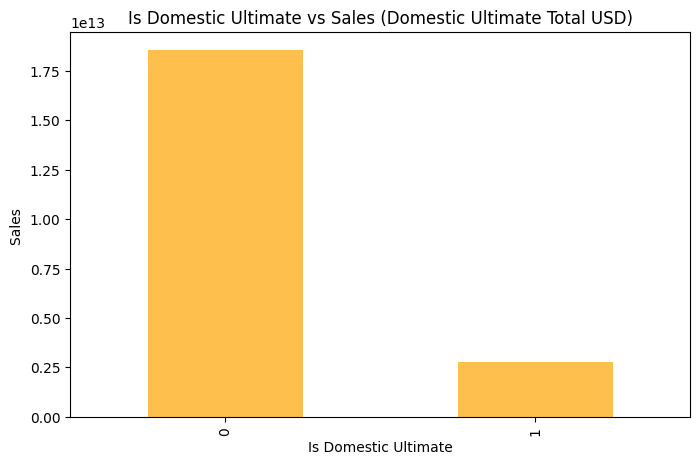

In [ ]:
# Numerical vs Categorical

# Bar chart for Is Domestic Ultimate vs Sales (Domestic Ultimate Total USD)
aggregated_data = df.groupby('Is Domestic Ultimate')['Sales (Domestic Ultimate Total USD)'].sum()
# aggregating Sales(Domestic Ultimate Total USD) by whether domestic is ultimate
plt.figure(figsize=(8, 5))
aggregated_data.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Is Domestic Ultimate vs Sales (Domestic Ultimate Total USD)')
plt.ylabel('Sales ')
plt.show()

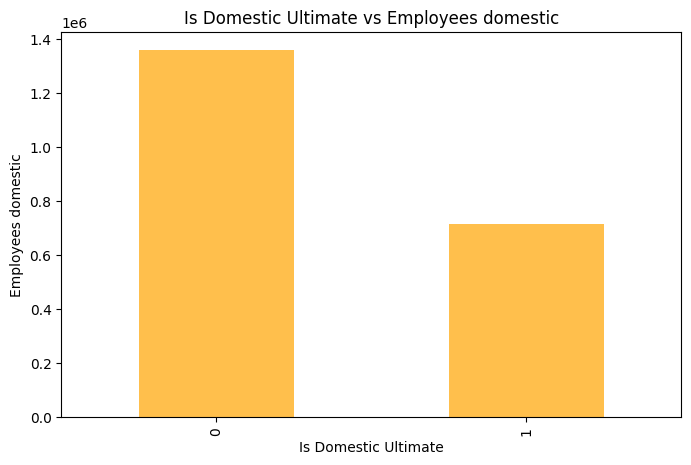

In [ ]:

# Numerical vs Categorical

# Bar chart for Is Domestic Ultimate vs Employees (Domestic Ultimate Total)
aggregated_data = df.groupby('Is Domestic Ultimate')['Employees (Domestic Ultimate Total)'].sum()
# aggregating Employees (Domestic Ultimate Total) by whether domestic is ultimate
plt.figure(figsize=(8, 5))
aggregated_data.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Is Domestic Ultimate vs Employees domestic')
plt.ylabel('Employees domestic')
plt.show()

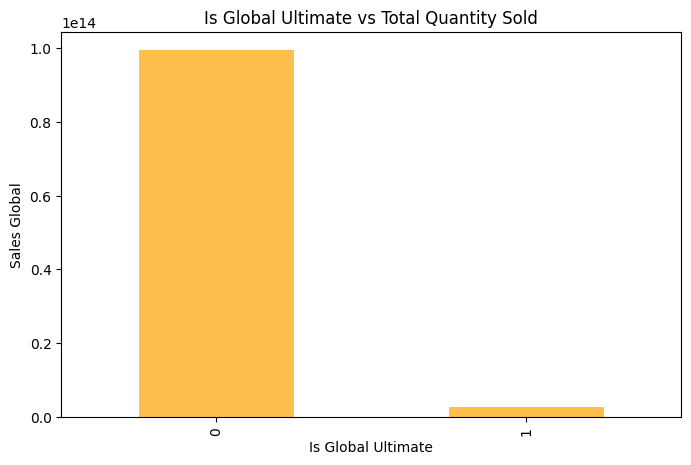

In [ ]:
# Numerical vs Categorical

# Bar chart for Is Global Ultimate vs Sales (Global Ultimate Total USD)
aggregated_data = df.groupby('Is Global Ultimate')['Sales (Global Ultimate Total USD)'].sum()
# aggregating Sales (Global Ultimate Total USD) by whether global is ultimate
plt.figure(figsize=(8, 5))
aggregated_data.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Is Global Ultimate vs Total Quantity Sold')
plt.ylabel('Sales Global')
plt.show()

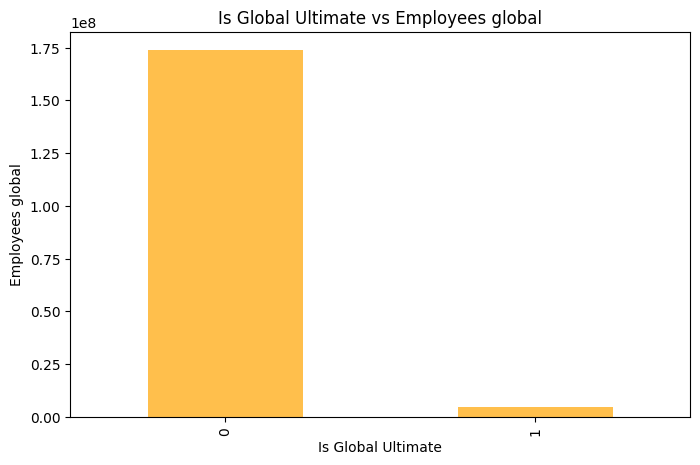

In [ ]:
# Bar chart for Is Global Ultimate vs Employee (Global Ultimate Total USD)
aggregated_data = df.groupby('Is Global Ultimate')['Employees (Global Ultimate Total)'].sum()
# aggregating Sales (Global Ultimate Total USD) by whether global is ultimate
plt.figure(figsize=(8, 5))
aggregated_data.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Is Global Ultimate vs Employees global')
plt.ylabel('Employees global')
plt.show()

# Data Preprocessing



## Train-Test Split Validation


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Is Global Ultimate", "Is Domestic Ultimate"])
y = df[["Is Global Ultimate", "Is Domestic Ultimate"]]

#splitting into training (80%) and temporary set (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (22705, 10) (22705, 2)
Test set: (5677, 10) (5677, 2)


In [ ]:
x.head()

,Latitude,Longitude,Industry,Year Found,Ownership Type,Company Status (Active/Inactive),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD)
0,1.238792,103.685898,"Plastics Materials, Synthetic Resins, and Nonv...",1980,Private,Active,300.0,300.0,76973100,76973100
1,1.240392,103.837565,Offices of Bank Holding Companies,1993,Private,Active,100.0,100.0,9499251,9499251
2,1.240392,103.837565,"Investors, Not Elsewhere Classified",2018,Private,Active,22.0,22.0,13738494,13738494
3,1.240409,103.837960,"Offices of Holding Companies, Not Elsewhere Cl...",2004,Private,Active,100.0,100.0,103745791,103745791
4,1.240784,103.839111,Offices of Bank Holding Companies,1986,Private,Active,33.0,33.0,60863682,60863682


##Scaling numerical data and encoding categorical data




In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_columns = x.select_dtypes(include=["number"]).columns
categorical_columns = x.select_dtypes(exclude=["number"]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)

# Apply preprocessing to training, and test sets
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)


##Checking Class Balance of "Is Domestic Ultimate" and "Is Global Ultimate"

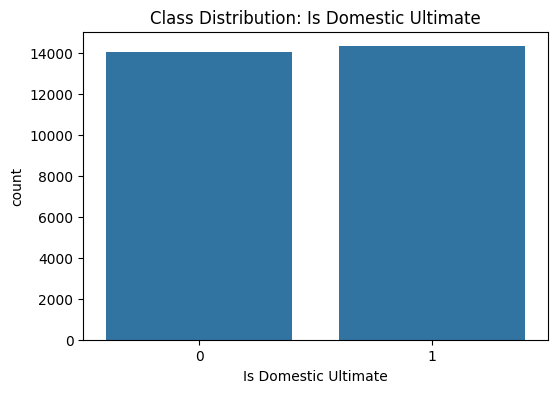

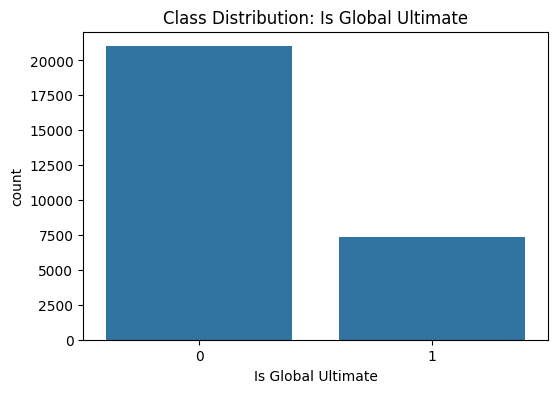

In [ ]:
import seaborn as sns

# Count plot for 'Is Domestic Ultimate'
plt.figure(figsize=(6,4))
sns.countplot(x=df["Is Domestic Ultimate"])
plt.title("Class Distribution: Is Domestic Ultimate")
plt.show()

# Count plot for 'Is Global Ultimate'
plt.figure(figsize=(6,4))
sns.countplot(x=df["Is Global Ultimate"])
plt.title("Class Distribution: Is Global Ultimate")
plt.show()


#### The class distribution for "Is Domestic Ultimate" is balanced while the class distribution for "Is Global Ultimate" is imbalanced with class "0" outnumbering class "1" significantly. Hence, classweights is used to balance the classes only for the "Is Global Ultimate" Models and separate models are used.


# Models

## Random Forest Model: "Is Domestic Ultimate"


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
model_dom = RandomForestClassifier(n_estimators=200, random_state=42)
model_dom.fit(x_train_preprocessed, y_train['Is Domestic Ultimate'])

# Evaluate the model
y_pred = model_dom.predict(x_test_preprocessed)
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test['Is Domestic Ultimate'], y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79      2809
           1       0.78      0.82      0.80      2868

    accuracy                           0.79      5677
   macro avg       0.80      0.79      0.79      5677
weighted avg       0.80      0.79      0.79      5677



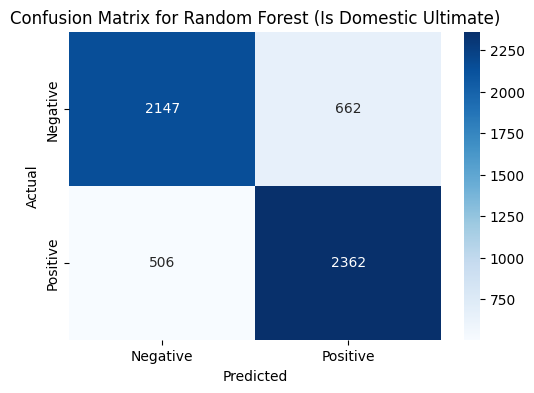

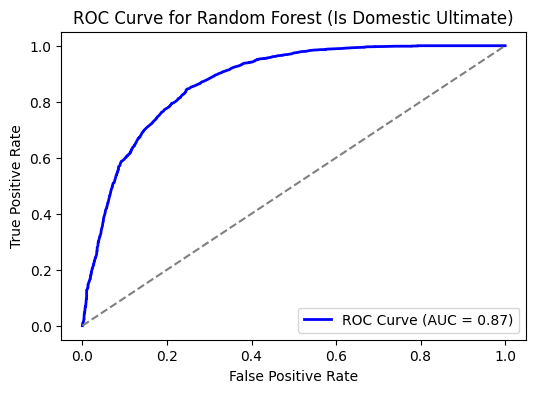

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Generate predictions and probabilities
y_pred_rf = model_dom.predict(x_test_preprocessed)
y_probs_rf = model_dom.predict_proba(x_test_preprocessed)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
cm_rf = confusion_matrix(y_test['Is Domestic Ultimate'], y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest (Is Domestic Ultimate)")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test['Is Domestic Ultimate'], y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest (Is Domestic Ultimate)")
plt.legend()
plt.show()

In [ ]:
# Get feature importances from Random Forest Model: "Is Domestic Ultimate"

feature_importances = model_dom.feature_importances_

numeric_features = numeric_columns.tolist()
categorical_features = categorical_columns.tolist()

# Extract the one-hot encoded feature names from the preprocessor
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(encoded_feature_names)
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

for cat in categorical_features:
    matching_features = [col for col in importance_df['Feature'] if col.startswith(cat + '_')]
    if matching_features:
        total_importance = importance_df.loc[importance_df['Feature'].isin(matching_features), 'Importance'].sum()
        importance_df = importance_df[~importance_df['Feature'].isin(matching_features)]
        importance_df = pd.concat([importance_df, pd.DataFrame({'Feature': [cat], 'Importance': [total_importance]})])

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

                               Feature  Importance
0                             Industry    0.223262
1  Sales (Domestic Ultimate Total USD)    0.117743
2    Employees (Global Ultimate Total)    0.114243
3                             Latitude    0.112067
4  Employees (Domestic Ultimate Total)    0.110022
5                            Longitude    0.108445
6                           Year Found    0.104177
7    Sales (Global Ultimate Total USD)    0.099452
8                       Ownership Type    0.010589
9     Company Status (Active/Inactive)    0.000000


## Random Forest Model: "Is Global Ultimate"

In [ ]:
# Apply classweights
model_global = RandomForestClassifier(class_weight="balanced", max_features=None,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)
model_global.fit(x_train_preprocessed, y_train['Is Global Ultimate'])

# Evaluate the model
y_pred = model_global.predict(x_test_preprocessed)
print("Classification Report:")
from sklearn.metrics import classification_report
print(classification_report(y_test['Is Global Ultimate'], y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4201
           1       0.65      0.82      0.72      1476

    accuracy                           0.84      5677
   macro avg       0.79      0.83      0.80      5677
weighted avg       0.86      0.84      0.84      5677



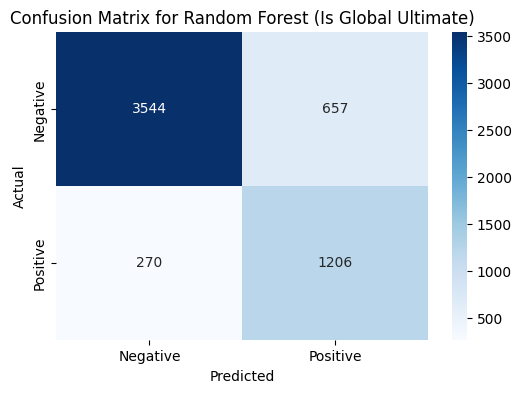

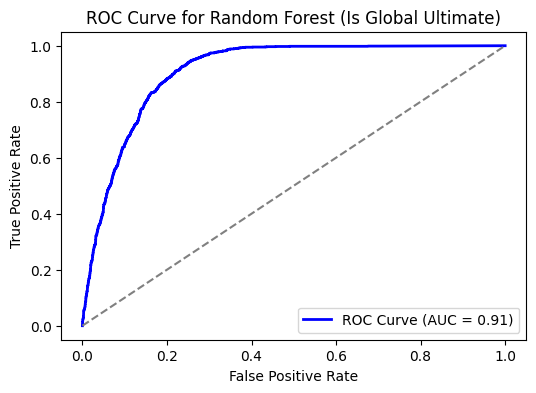

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Generate predictions and probabilities
y_pred_rf = model_global.predict(x_test_preprocessed)
y_probs_rf = model_global.predict_proba(x_test_preprocessed)[:, 1]  # Probabilities for the positive class

# Confusion Matrix
cm_rf = confusion_matrix(y_test['Is Global Ultimate'], y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest (Is Global Ultimate)")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test['Is Global Ultimate'], y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest (Is Global Ultimate)")
plt.legend()
plt.show()

In [ ]:
# Get feature importances from Random Forest Model: "Is Global Ultimate"

feature_importances = model_global.feature_importances_

numeric_features = numeric_columns.tolist()
categorical_features = categorical_columns.tolist()

# Extract the one-hot encoded feature names from the preprocessor
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(encoded_feature_names)
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

for cat in categorical_features:
    matching_features = [col for col in importance_df['Feature'] if col.startswith(cat + '_')]
    if matching_features:
        total_importance = importance_df.loc[importance_df['Feature'].isin(matching_features), 'Importance'].sum()
        importance_df = importance_df[~importance_df['Feature'].isin(matching_features)]
        importance_df = pd.concat([importance_df, pd.DataFrame({'Feature': [cat], 'Importance': [total_importance]})])

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)

                               Feature  Importance
0    Employees (Global Ultimate Total)    0.293205
1  Sales (Domestic Ultimate Total USD)    0.126384
2                             Industry    0.111122
3    Sales (Global Ultimate Total USD)    0.105164
4                             Latitude    0.092344
5                           Year Found    0.090837
6  Employees (Domestic Ultimate Total)    0.076268
7                            Longitude    0.071141
8                       Ownership Type    0.033535
9     Company Status (Active/Inactive)    0.000000
